# Testing Interactiu d'Eines MCP Salesforce

Aquest notebook et mostra com utilitzar Jupyter per a:
- Provar les eines MCP de forma interactiva
- Documentar exemples d'ús
- Fer debugging del codi
- Experimentar amb diferents aproximacions


## 1. Configuració Inicial

Primer, configurem l'entorn per a treballar amb el servidor MCP:


In [20]:
# Importem les dependències necessàries
import json
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Configuració del servidor MCP
MCP_SERVER_URL = "http://localhost:3000"  # Ajusta segons la teva configuració

print(f"Conectant al servidor MCP a: {MCP_SERVER_URL}")
print(f"Data i hora actual: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


Conectant al servidor MCP a: http://localhost:3000
Data i hora actual: 2025-08-20 22:10:48


## 2. Testing de l'Eina d'Execució SOQL

Provem com funciona l'eina d'execució de consultes SOQL:


In [21]:
# Exemple de consulta SOQL simple
def test_soql_query(query):
    """
    Prova una consulta SOQL i retorna els resultats
    """
    try:
        # Aquí faríem la crida real al servidor MCP
        # Per ara, simularem la resposta

        # Simulació de resposta
        mock_response = {
            "success": True,
            "query": query,
            "results": [
                {"Id": "001", "Name": "Account 1", "Industry": "Technology"},
                {"Id": "002", "Name": "Account 2", "Industry": "Healthcare"}
            ]
        }

        return mock_response
    except Exception as e:
        return {"error": str(e)}

# Provem diferents consultes
test_queries = [
    "SELECT Id, Name FROM Account LIMIT 5",
    "SELECT Id, Name, Industry FROM Account WHERE Industry = 'Technology'",
    "SELECT Id, Name, CreatedDate FROM Account ORDER BY CreatedDate DESC LIMIT 10"
]

print("=== Testing SOQL Queries ===")
for query in test_queries:
    print(f"\nQuery: {query}")
    result = test_soql_query(query)
    print(f"Result: {json.dumps(result, indent=2)}")


=== Testing SOQL Queries ===

Query: SELECT Id, Name FROM Account LIMIT 5
Result: {
  "success": true,
  "query": "SELECT Id, Name FROM Account LIMIT 5",
  "results": [
    {
      "Id": "001",
      "Name": "Account 1",
      "Industry": "Technology"
    },
    {
      "Id": "002",
      "Name": "Account 2",
      "Industry": "Healthcare"
    }
  ]
}

Query: SELECT Id, Name, Industry FROM Account WHERE Industry = 'Technology'
Result: {
  "success": true,
  "query": "SELECT Id, Name, Industry FROM Account WHERE Industry = 'Technology'",
  "results": [
    {
      "Id": "001",
      "Name": "Account 1",
      "Industry": "Technology"
    },
    {
      "Id": "002",
      "Name": "Account 2",
      "Industry": "Healthcare"
    }
  ]
}

Query: SELECT Id, Name, CreatedDate FROM Account ORDER BY CreatedDate DESC LIMIT 10
Result: {
  "success": true,
  "query": "SELECT Id, Name, CreatedDate FROM Account ORDER BY CreatedDate DESC LIMIT 10",
  "results": [
    {
      "Id": "001",
      "Name"

## 3. Anàlisi de Resultats amb Pandas

Utilitzem pandas per a analitzar i visualitzar els resultats:


=== Anàlisi de Resultats ===
Total de registres: 2

Primers 5 registres:
    Id       Name    Industry
0  001  Account 1  Technology
1  002  Account 2  Healthcare

Distribució per indústria:
Industry
Technology    1
Healthcare    1
Name: count, dtype: int64


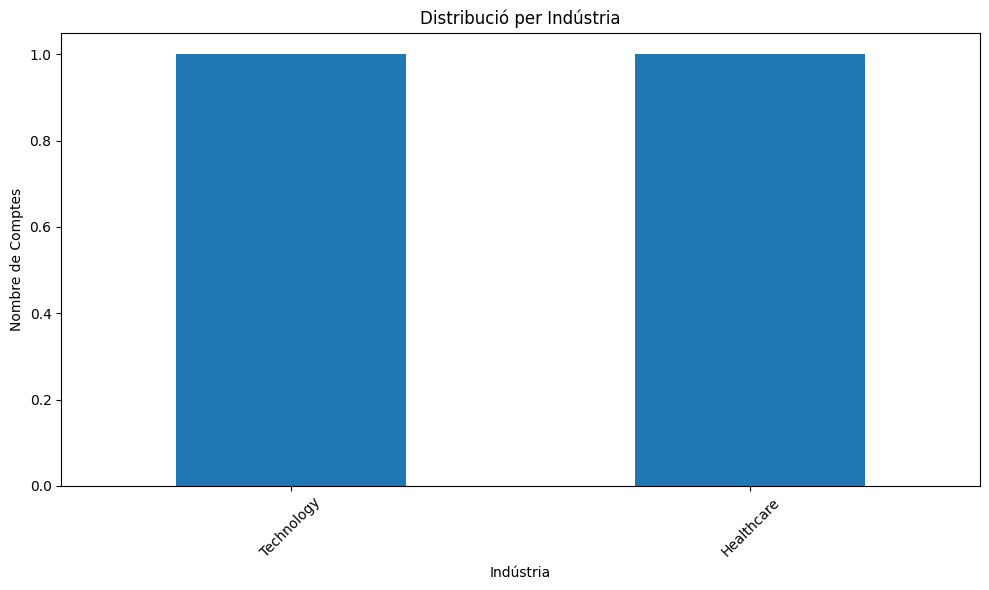

In [22]:
# Convertim els resultats a un DataFrame de pandas
def analyze_results(results):
    """
    Analitza els resultats de les consultes SOQL
    """
    if "results" in results:
        df = pd.DataFrame(results["results"])

        print("=== Anàlisi de Resultats ===")
        print(f"Total de registres: {len(df)}")
        print(f"\nPrimers 5 registres:")
        print(df.head())

        # Anàlisi estadístic bàsic
        if "Industry" in df.columns:
            print(f"\nDistribució per indústria:")
            industry_counts = df["Industry"].value_counts()
            print(industry_counts)

            # Visualització simple
            plt.figure(figsize=(10, 6))
            industry_counts.plot(kind='bar')
            plt.title('Distribució per Indústria')
            plt.xlabel('Indústria')
            plt.ylabel('Nombre de Comptes')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        return df
    else:
        print("No hi ha resultats per analitzar")
        return None

# Analitzem els resultats de la primera consulta
first_result = test_soql_query("SELECT Id, Name, Industry FROM Account LIMIT 10")
df = analyze_results(first_result)
